# Walt Erbach's Calculator

This code was generated from the Basic code presented in the 1980 NFFS Symposium. 

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Liftand drag  coeffients for McBride B-7 from Frank Zaic's Yearbook
C_l = [0.06, 0.135, 0.2, 0.25, 0.3, 0.35, 0.395, 0.44]
C_d = [0.008, 0.009, 0.01, 0.012, 0.014, 0.019, 0.024, 0.0335]
alpha = [-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0]

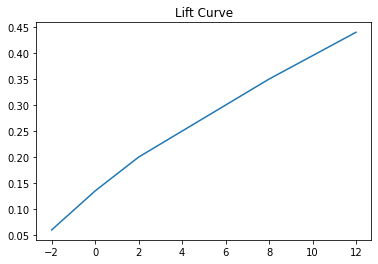

In [3]:
plt.plot(alpha, C_l)
plt.title('Lift Curve')
plt.show()

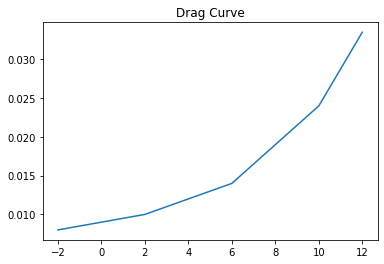

In [4]:
plt.plot(alpha, C_d)
plt.title('Drag Curve')
plt.show()

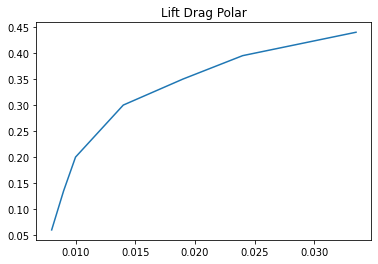

In [5]:
plt.plot(C_d, C_l)
plt.title('Lift Drag Polar')
plt.show()

In [6]:
# model parameters
AW = 150.0     # model wing area in square inches
SW = AW/144.0  # model wing area in square feet
WC = 5.5       # wing chord in inches
WI = 4         # wing incidence in degrees
WH = 3.0       # wing height in inches
W = 0.070      # model weight in ounces
WT = W/16.0    # weight in pounds
PCW = 0.40     # ratio of stab area to wing area
TA = 17.0      # distance from 25% wing chord to 25% stab chord

In [7]:
## Generate parametric values

In [8]:
import numpy as np
wing_incidence = np.linspace(0,12,13)
wing_height = np.linspace(0,3,7)
center_of_gravity = np.linspace(0.3,1.0,8)
body_angle = np.linspace(-2,12,8)
stab_size = np.linspace(20,50,7)

In [9]:
air_density = 0.00119

## Using Curve Data

In this study, we will be using digitized data points obtained from images of data in references. What we need is a way to use that data to produce a function that can give us values for any point in the range of the data, and possible a bit beyond both ends. 

We can use linear interpolation for points in our data range, and linear extrapolation beyond the end points. Let's create a simple function that does this for a given digitized data set. This function does not require evenly spaced data points.

In [10]:
def query(xq, x, y):
    # interpotate/extrapolate evenly spaced data
    n = len(x)
    x_l = x[n-1]
    dx = x[1] - x[0]

    if xq < x[0]:  # extrapolate left side
        print("extrapolate left")
        dydxl = (y[1] - y[0])/(x[1]-x[0])
        return y[0] - dydxl * (x[0] - xq)
    if xq > x[n-1]:
        print("extrapolate right")
        dydxr = (y[n-1] - y[n-2])/(x[n-1]-x[n-2])
        return y[n-1]+dydxr * (xq - x[n-1])
    # handle interpolation
    print("interpolate")
    # find interval for this query
    yq = -100
    for i in range(1,n):
        il = i - 1
        ir = i
        if xq >= x[il] and xq <= x[ir]:
            s = "*"
            yq = y[il] + (y[ir] - y[il])/(x[ir]-x[il])*(xq-x[il])
            break
    return  yq

In [11]:
print(query(-3.0, alpha, C_l))

extrapolate left
0.022499999999999992


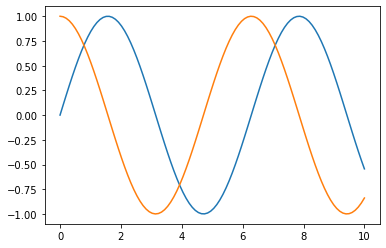

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

## Parametric Study

Erbach's study analyzed power required for level flight against a number of parameters:
- wing incidence
- stab size
- cg location

To that we can add other possible parameters:
- wing height

Most of the curves presented in Erbach's papers were plots of power versus CG location with wing incidence or stab size as the third variable. Rather than showing a series of plots for the third variable, we can create 3D surface plots easily using **matplotlib**.

To simplify this work, we will build a generic 3D plotting function that takes the three data arrays and a surface function to generate the 3D plot.

The input data for this plot are three 1d lists of values that are reformed into 2D arrays using the **reshape** method. The **X** and **Y** arrays are basically copies of each other in the **Z** direction. The **Z** array is where the surface data is found. Our job is to generate these three lists of values.

Let's try a simple experiment to see how we can do this:

Our job now is to generate lists that can be used for our study. We have already set up lists for the parameter data we will be using.

In [13]:
print(center_of_gravity)

[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [14]:
print(stab_size)

[20. 25. 30. 35. 40. 45. 50.]


In [15]:
X,Y = np.meshgrid(center_of_gravity, stab_size)
print(X)

[[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]


In [16]:
print(Y)

[[20. 20. 20. 20. 20. 20. 20. 20.]
 [25. 25. 25. 25. 25. 25. 25. 25.]
 [30. 30. 30. 30. 30. 30. 30. 30.]
 [35. 35. 35. 35. 35. 35. 35. 35.]
 [40. 40. 40. 40. 40. 40. 40. 40.]
 [45. 45. 45. 45. 45. 45. 45. 45.]
 [50. 50. 50. 50. 50. 50. 50. 50.]]


For this experiment, we will generate a simple surface with a function that simple multiplies the **x** and **y** values.

In [17]:
def power(x,y):
    return x * y

Now, we ask **numpy** to generate the surface data using this function.

In [18]:
Z = power(X,Y)

With these three data arrays, the plot is simple.

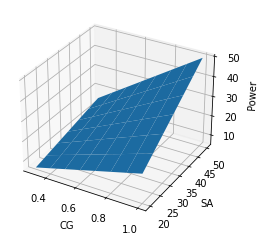

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('CG')
ax.set_ylabel('SA')
ax.set_zlabel('Power')

plt.show()

## Interactive Plotting

With a little help from another *Python* package, **ipympl**, we can create interactive plots to play with parameters in our study. Our experiment above gave us a way to visualize three parameters as a surface plot. What we want to do not is add a fourth parameter that can be altered by the user. For now, we will simply scale the result of the **power** function using a slider control.

In [20]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget

## Writing the Power Function

With the parametric setup in place, we can now turn to the calculation of th epower required for level flight. These equations were taken from Erbach's *Basic* program.

In [21]:
import math
def power(WI, SA, CG, PCW):
    print(WI, SA, CG, PCW)
    rho = 0.00119
    alpha_w = (WI + SA)   # Wing angle of attack
    alpha_s = (SA)        # Stab angle of attack
    C_lw = query(alpha_w, alpha, C_l)
    C_ls = query(alpha_s, alpha, C_l)
    C_dw = query(alpha_w, alpha, C_d)
    C_ds = query(alpha_s, alpha, C_d)
    print(C_lw, C_ls, C_dw, C_ds)

    VE = (WT/(0.00119*SW*(C_lw + PCW*C_ls)))**0.5
    VE2_16 = VE*VE*16
    f1 = rho/2.0*SW*VE2_16
    AWL = C_ls * f1
    BWD = C_lw * f1
    CTL = C_dw * f1*PCW
    DTD = C_ds * f1*PCW

    PWR= VE*(BWD+DTD)*12
    DW = WC * (CG -0.25) 
    R = SA * math.pi/180.0
    EWLA = WH+math.sin(R)+DW*math.cos(R)
    FWDA = WH*math.cos(R)-DW*math.sin(R)
    GTLA = (TA-DW)*math.cos(R)
    HTDA = (TA-DW)*math.sin(R)
    JMWL = AWL*EWLA
    KMWD = BWD*FWDA
    LMTL = -CTL*GTLA
    MMTD = DTD*HTDA
    CM = JMWL + KMWD + LMTL + MMTD
    CO = CG*100
    print(VE, PWR, CM, CO)

In [22]:
power(4,2,0.4,.4)

4 2 0.4 0.4
interpolate
interpolate
interpolate
interpolate
0.3 0.2 0.014 0.01
3.047609833393118 1.023996904020088 0.14501298377698177 40.0


## Testing Erbach's Looops

It seems that the first attempt at prooducing power and moment data does not match the original paper. We need to work through the code and see where the problem lies.

In [60]:
WI = 4
for H in range(1,6):
    print("H",H," WI",WI)
    SA = 2
    for J in range(1,7):
        JW = J + WI/2
        print("  J",J," JW",JW)
        WA = WI - SA
        print("  WI",WI," WA", WA, " SA",SA)
        SA -=2
    WI +=2

H 1  WI 4
  J 1  JW 3.0
  WI 4  WA 2  SA 2
  J 2  JW 4.0
  WI 4  WA 4  SA 0
  J 3  JW 5.0
  WI 4  WA 6  SA -2
  J 4  JW 6.0
  WI 4  WA 8  SA -4
  J 5  JW 7.0
  WI 4  WA 10  SA -6
  J 6  JW 8.0
  WI 4  WA 12  SA -8
H 2  WI 6
  J 1  JW 4.0
  WI 6  WA 4  SA 2
  J 2  JW 5.0
  WI 6  WA 6  SA 0
  J 3  JW 6.0
  WI 6  WA 8  SA -2
  J 4  JW 7.0
  WI 6  WA 10  SA -4
  J 5  JW 8.0
  WI 6  WA 12  SA -6
  J 6  JW 9.0
  WI 6  WA 14  SA -8
H 3  WI 8
  J 1  JW 5.0
  WI 8  WA 6  SA 2
  J 2  JW 6.0
  WI 8  WA 8  SA 0
  J 3  JW 7.0
  WI 8  WA 10  SA -2
  J 4  JW 8.0
  WI 8  WA 12  SA -4
  J 5  JW 9.0
  WI 8  WA 14  SA -6
  J 6  JW 10.0
  WI 8  WA 16  SA -8
H 4  WI 10
  J 1  JW 6.0
  WI 10  WA 8  SA 2
  J 2  JW 7.0
  WI 10  WA 10  SA 0
  J 3  JW 8.0
  WI 10  WA 12  SA -2
  J 4  JW 9.0
  WI 10  WA 14  SA -4
  J 5  JW 10.0
  WI 10  WA 16  SA -6
  J 6  JW 11.0
  WI 10  WA 18  SA -8
H 5  WI 12
  J 1  JW 7.0
  WI 12  WA 10  SA 2
  J 2  JW 8.0
  WI 12  WA 12  SA 0
  J 3  JW 9.0
  WI 12  WA 14  SA -2
  J 4  JW 1